In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
from scipy import stats

# Display settings
pd.set_option("display.max_columns", None)
plt.style.use("default")


In [2]:
df = pd.read_csv("/content/annex1.csv")

In [3]:
df.head()


,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [4]:
df.tail()


,Item Code,Item Name,Category Code,Category Name
246,106958851400125,Haixian Mushroom (Bag) (4),1011010801,Edible Mushroom
247,106971533450003,Haixian Mushroom (Bunch),1011010801,Edible Mushroom
248,106971533455008,Haixian Mushroom (Bag) (3),1011010801,Edible Mushroom
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),1011010801,Edible Mushroom
250,106973990980123,Hfyg Haixian Mushroom (Bunch),1011010801,Edible Mushroom


In [5]:
df.shape

(251, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [7]:
df.describe(include="all")

,Item Code,Item Name,Category Code,Category Name
count,2.510000e+02,251,2.510000e+02,251
unique,NaN,247,NaN,6
top,NaN,Chinese Cabbage,NaN,Flower/Leaf Vegetables
freq,NaN,2,NaN,100
mean,1.031908e+14,NaN,1.011010e+09,NaN
std,1.048400e+12,NaN,2.915469e+02,NaN
min,1.029000e+14,NaN,1.011010e+09,NaN
25%,1.029000e+14,NaN,1.011010e+09,NaN
50%,1.029000e+14,NaN,1.011011e+09,NaN
75%,1.029000e+14,NaN,1.011011e+09,NaN


In [9]:
#Create Engineering Copies
raw_df = df.copy()
clean_df = df.copy()

#STEP 2: Data Quality & Engineering

In [13]:
#for Duplicate Rows
clean_df.duplicated().sum()


np.int64(0)

In [14]:
#Check Duplicate Item Names
clean_df["Item Name"].value_counts().head(10)


,count
Item Name,
Chinese Cabbage,2
Broccoli,2
Apricot Bao Mushroom (Bag),2
Chinese Caterpillar Fungus Flowers (Bag),2
Amaranth,1
White Caitai,1
Sichuan Red Cedar,1
Zhuyecai,1
Nanguajian,1


In [15]:
duplicate_items = clean_df[clean_df["Item Name"].duplicated(keep=False)]
duplicate_items.sort_values("Item Name")


,Item Code,Item Name,Category Code,Category Name
201,102900011012994,Apricot Bao Mushroom (Bag),1011010801,Edible Mushroom
215,102900011031599,Apricot Bao Mushroom (Bag),1011010801,Edible Mushroom
94,102900051000890,Broccoli,1011010101,Flower/Leaf Vegetables
100,102900005116714,Broccoli,1011010201,Cabbage
7,102900005115793,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
16,102900005115960,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
203,102900011018095,Chinese Caterpillar Fungus Flowers (Bag),1011010801,Edible Mushroom
218,102900011031926,Chinese Caterpillar Fungus Flowers (Bag),1011010801,Edible Mushroom


In [17]:
#Validate Category Consistency

#Category Code → Category Name
clean_df.groupby("Category Code")["Category Name"].nunique()


,Category Name
Category Code,
1011010101,1
1011010201,1
1011010402,1
1011010501,1
1011010504,1
1011010801,1


In [18]:
#Category Name → Category Code
clean_df.groupby("Category Name")["Category Code"].nunique()

,Category Code
Category Name,
Aquatic Tuberous Vegetables,1
Cabbage,1
Capsicum,1
Edible Mushroom,1
Flower/Leaf Vegetables,1
Solanum,1


In [19]:
#Fix Data Types
clean_df["Item Code"] = clean_df["Item Code"].astype(str)
clean_df["Category Code"] = clean_df["Category Code"].astype(str)


In [22]:
#Feature Engineering

#Item Name Length
clean_df["item_name_length"] = clean_df["Item Name"].apply(len)

#Number of Words in Item Name
clean_df["item_name_word_count"] = clean_df["Item Name"].apply(lambda x: len(x.split()))

#Category Size (How many items per category)
category_size = clean_df["Category Name"].value_counts()
clean_df["category_item_count"] = clean_df["Category Name"].map(category_size)


#STEP 3: Exploratory Data Analysis

In [23]:
#Category Distribution Analysis
#Count items per category
category_dist = clean_df["Category Name"].value_counts()
category_dist


,count
Category Name,
Flower/Leaf Vegetables,100
Edible Mushroom,72
Capsicum,45
Aquatic Tuberous Vegetables,19
Solanum,10
Cabbage,5


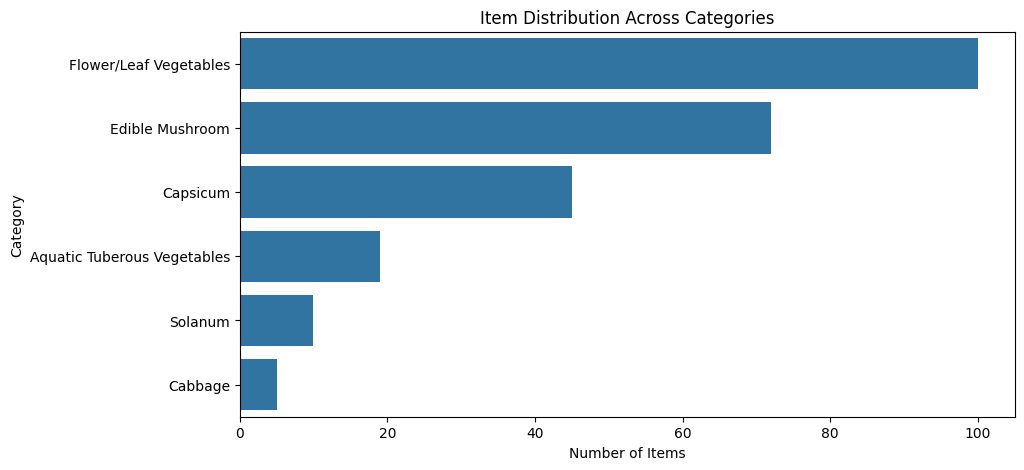

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(
    x=category_dist.values,
    y=category_dist.index
)
plt.title("Item Distribution Across Categories")
plt.xlabel("Number of Items")
plt.ylabel("Category")
plt.show()


In [28]:
clean_df.columns


Index(['Item Code', 'Item Name', 'Category Code', 'Category Name',
       'item_name_length', 'item_name_word_count', 'category_item_count'],
      dtype='object')

In [29]:
clean_df["is_duplicate_item_name"] = clean_df["Item Name"].duplicated(keep=False)


In [30]:
clean_df["is_duplicate_item_name"].value_counts()


,count
is_duplicate_item_name,
False,243
True,8


In [31]:
#Hypothesis
#H1: “Product duplication is more common in high-volume categories.”

dup_by_category = clean_df.groupby("Category Name")["is_duplicate_item_name"].sum()
dup_by_category


,is_duplicate_item_name
Category Name,
Aquatic Tuberous Vegetables,0
Cabbage,1
Capsicum,0
Edible Mushroom,4
Flower/Leaf Vegetables,3
Solanum,0


In [32]:
#Compare with category size
dup_ratio = (
    clean_df.groupby("Category Name")["is_duplicate_item_name"].sum()
    / clean_df.groupby("Category Name").size()
)

dup_ratio.sort_values(ascending=False)


,0
Category Name,
Cabbage,0.200000
Edible Mushroom,0.055556
Flower/Leaf Vegetables,0.030000
Aquatic Tuberous Vegetables,0.000000
Capsicum,0.000000
Solanum,0.000000


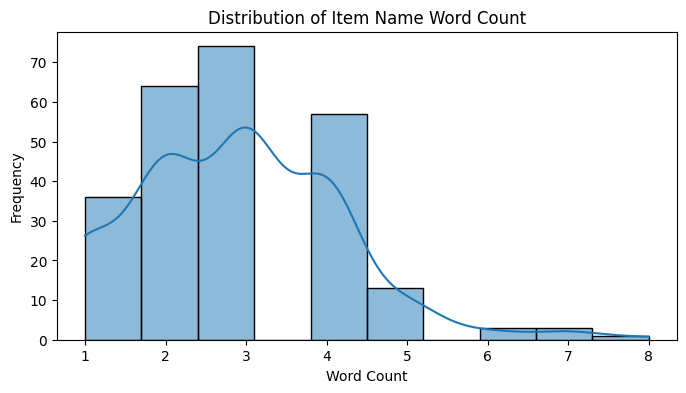

In [33]:
#Item Name Complexity Analysis
#Distribution of word counts
plt.figure(figsize=(8,4))
sns.histplot(clean_df["item_name_word_count"], bins=10, kde=True)
plt.title("Distribution of Item Name Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


In [34]:
#Anomaly Detection
clean_df.sort_values("item_name_word_count", ascending=False).head(10)


,Item Code,Item Name,Category Code,Category Name,item_name_length,item_name_word_count,category_item_count,is_duplicate_item_name
230,102900011035740,Crab Flavor Mushroom And White Mushroom Mix (Box),1011010801,Edible Mushroom,49,8,72,False
177,102900011036242,Green And Red Jian Pepper Mix (Bag),1011010504,Capsicum,35,7,45,False
229,102900011034705,The Fungus Mushroom Hot Pot Package (Bag),1011010801,Edible Mushroom,41,7,72,False
175,102900011034439,Green And Red Hang Pepper Mix (Bag),1011010504,Capsicum,35,7,45,False
173,102900011032848,Ginger And Xiaomijiao Mix (Small Bag),1011010504,Capsicum,37,6,45,False
198,102900011011782,Chinese Caterpillar Fungus Flowers (Box) (1),1011010801,Edible Mushroom,44,6,72,False
249,106973223300667,Chinese Caterpillar Fungus Flowers (Box) (2),1011010801,Edible Mushroom,44,6,72,False
146,102900011001219,The Red Bell Pepper (1),1011010504,Capsicum,23,5,45,False
114,102900011021842,Honghu Lotus Root Powder (Fenou),1011010402,Aquatic Tuberous Vegetables,32,5,19,False
116,102900011024010,Fresh Lotus Root Zone (Bag),1011010402,Aquatic Tuberous Vegetables,27,5,19,False


#STEP 4: Strategic Insights + Visualization Layer

In [37]:
#KPI 1: Total Items
total_items = clean_df.shape[0]
total_items

251

In [38]:
#KPI 2: Total Categories
total_categories = clean_df["Category Name"].nunique()
total_categories

6

In [43]:
#KPI 3: Duplicate Item Rate
duplicate_rate = (
    clean_df["is_duplicate_item_name"].sum() / clean_df.shape[0]
) * 100
print(duplicate_rate)

3.187250996015936


In [42]:
#KPI 4: Largest Category Share
largest_category_pct = (
    clean_df["Category Name"].value_counts(normalize=True).iloc[0] * 100
)
print(largest_category_pct)

39.8406374501992


###“These KPIs give a quick health check of the product catalog — size, diversity, duplication risk, and concentration.”

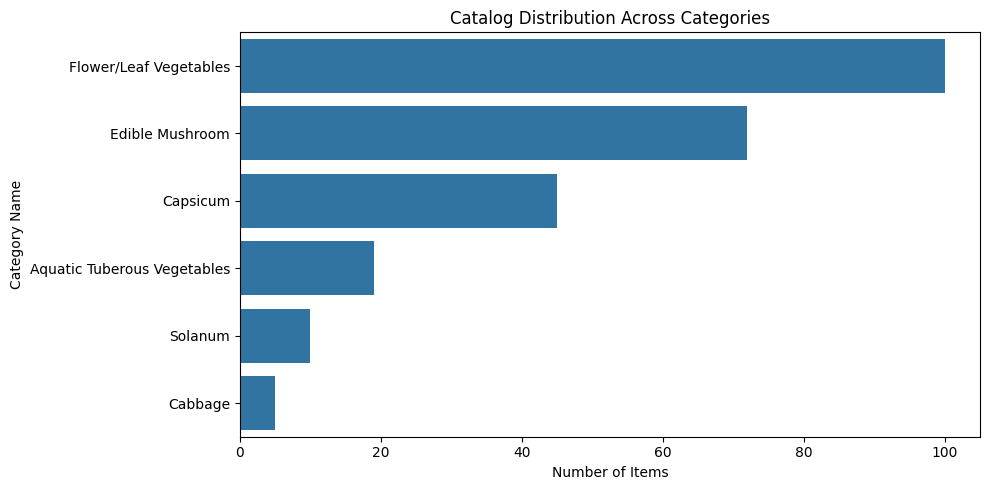

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(
    y=clean_df["Category Name"].value_counts().index,
    x=clean_df["Category Name"].value_counts().values
)

plt.title("Catalog Distribution Across Categories")
plt.xlabel("Number of Items")
plt.ylabel("Category Name")
plt.tight_layout()
plt.show()


###A small number of categories account for a large share of the catalog, indicating strong category concentration.

In [46]:
dup_ratio = (
    clean_df.groupby("Category Name")["is_duplicate_item_name"].sum()
    / clean_df.groupby("Category Name").size()
).sort_values(ascending=False)


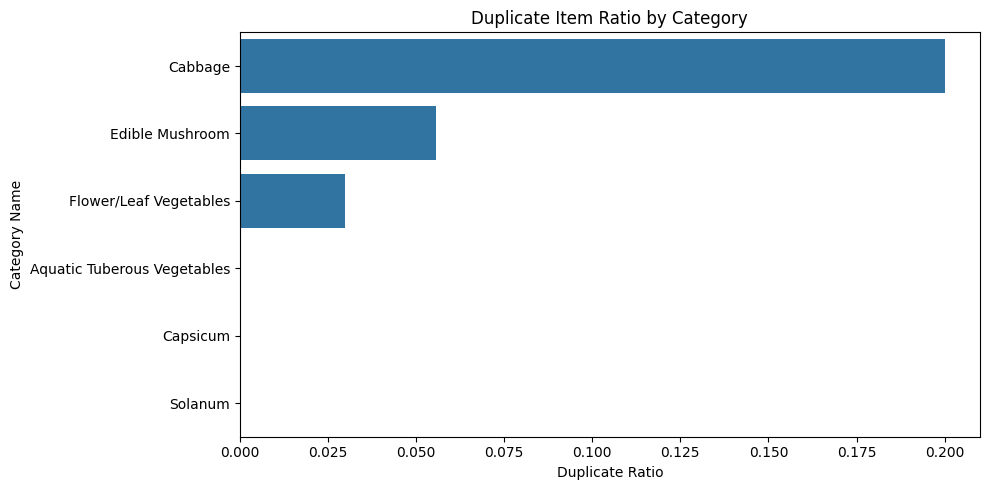

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(
    y=dup_ratio.index,
    x=dup_ratio.values
)

plt.title("Duplicate Item Ratio by Category")
plt.xlabel("Duplicate Ratio")
plt.ylabel("Category Name")
plt.tight_layout()
plt.show()


###Categories with higher duplication ratios are more prone to SKU fragmentation, impacting reporting accuracy and inventory control.

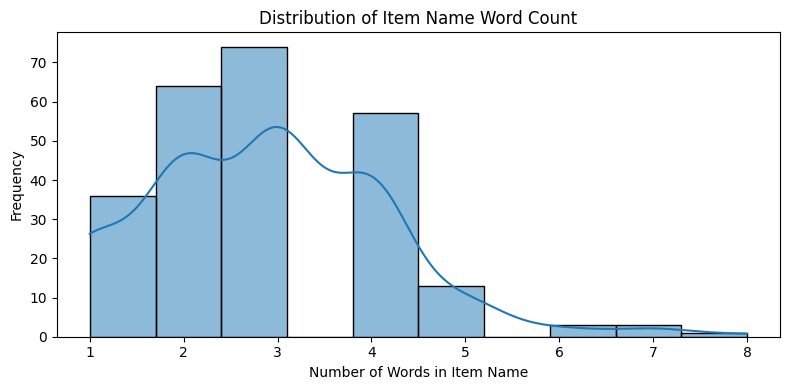

In [48]:
plt.figure(figsize=(8,4))
sns.histplot(clean_df["item_name_word_count"], bins=10, kde=True)
plt.title("Distribution of Item Name Word Count")
plt.xlabel("Number of Words in Item Name")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


###Longer item names typically indicate packaged or specialized products, suggesting implicit product tiering.

In [ ]:
#Extremely long names represent niche or premium items that
#may require separate segmentation strategies.

In [52]:
long_names = clean_df.sort_values(
    "item_name_word_count", ascending=False
).head(10)

long_names[["Item Name", "Category Name", "item_name_word_count"]]


,Item Name,Category Name,item_name_word_count
230,Crab Flavor Mushroom And White Mushroom Mix (Box),Edible Mushroom,8
177,Green And Red Jian Pepper Mix (Bag),Capsicum,7
229,The Fungus Mushroom Hot Pot Package (Bag),Edible Mushroom,7
175,Green And Red Hang Pepper Mix (Bag),Capsicum,7
173,Ginger And Xiaomijiao Mix (Small Bag),Capsicum,6
198,Chinese Caterpillar Fungus Flowers (Box) (1),Edible Mushroom,6
249,Chinese Caterpillar Fungus Flowers (Box) (2),Edible Mushroom,6
146,The Red Bell Pepper (1),Capsicum,5
114,Honghu Lotus Root Powder (Fenou),Aquatic Tuberous Vegetables,5
116,Fresh Lotus Root Zone (Bag),Aquatic Tuberous Vegetables,5


## Key Strategic Takeaways

- The catalog shows strong category concentration, indicating a focused but potentially risky product mix.
- Multiple items share identical names across different codes, revealing catalog fragmentation.
- Duplication risk is unevenly distributed across categories, highlighting priority areas for normalization.
- Naming complexity reveals implicit product tiers that can be leveraged for segmentation and planning.

## Recommendations

- Introduce a master product ID with variant attributes to reduce duplication.
- Monitor high-duplication categories to improve catalog quality.
- Segment products based on naming complexity to support differentiated strategies.
